In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
# lower the columns name of X and y
X.columns = X.columns.str.lower()
y.columns = y.columns.str.lower()

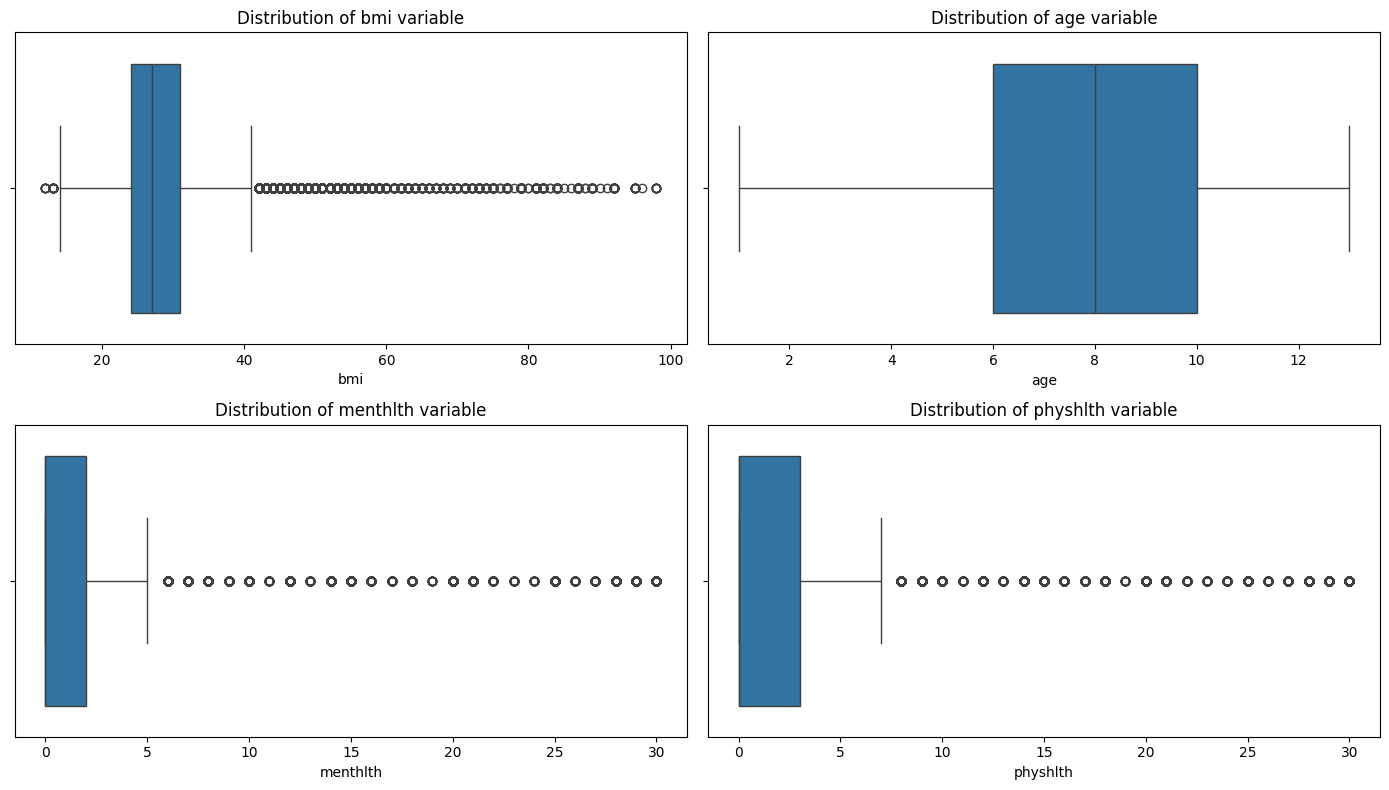

In [ ]:
num_var = ['bmi', 'age', 'menthlth', 'physhlth'] 

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axs = axes.flatten() 

for i, num in enumerate(num_var):
    sns.boxplot(data=X, x=num, ax=axs[i])
    axs[i].set_title(f'Distribution of {num} variable')

plt.tight_layout()
plt.show()

All variables except age have outliers

In [ ]:
bin_var = [col for col in X.columns if col not in num_var+['education', 'income', 'genhlth']]

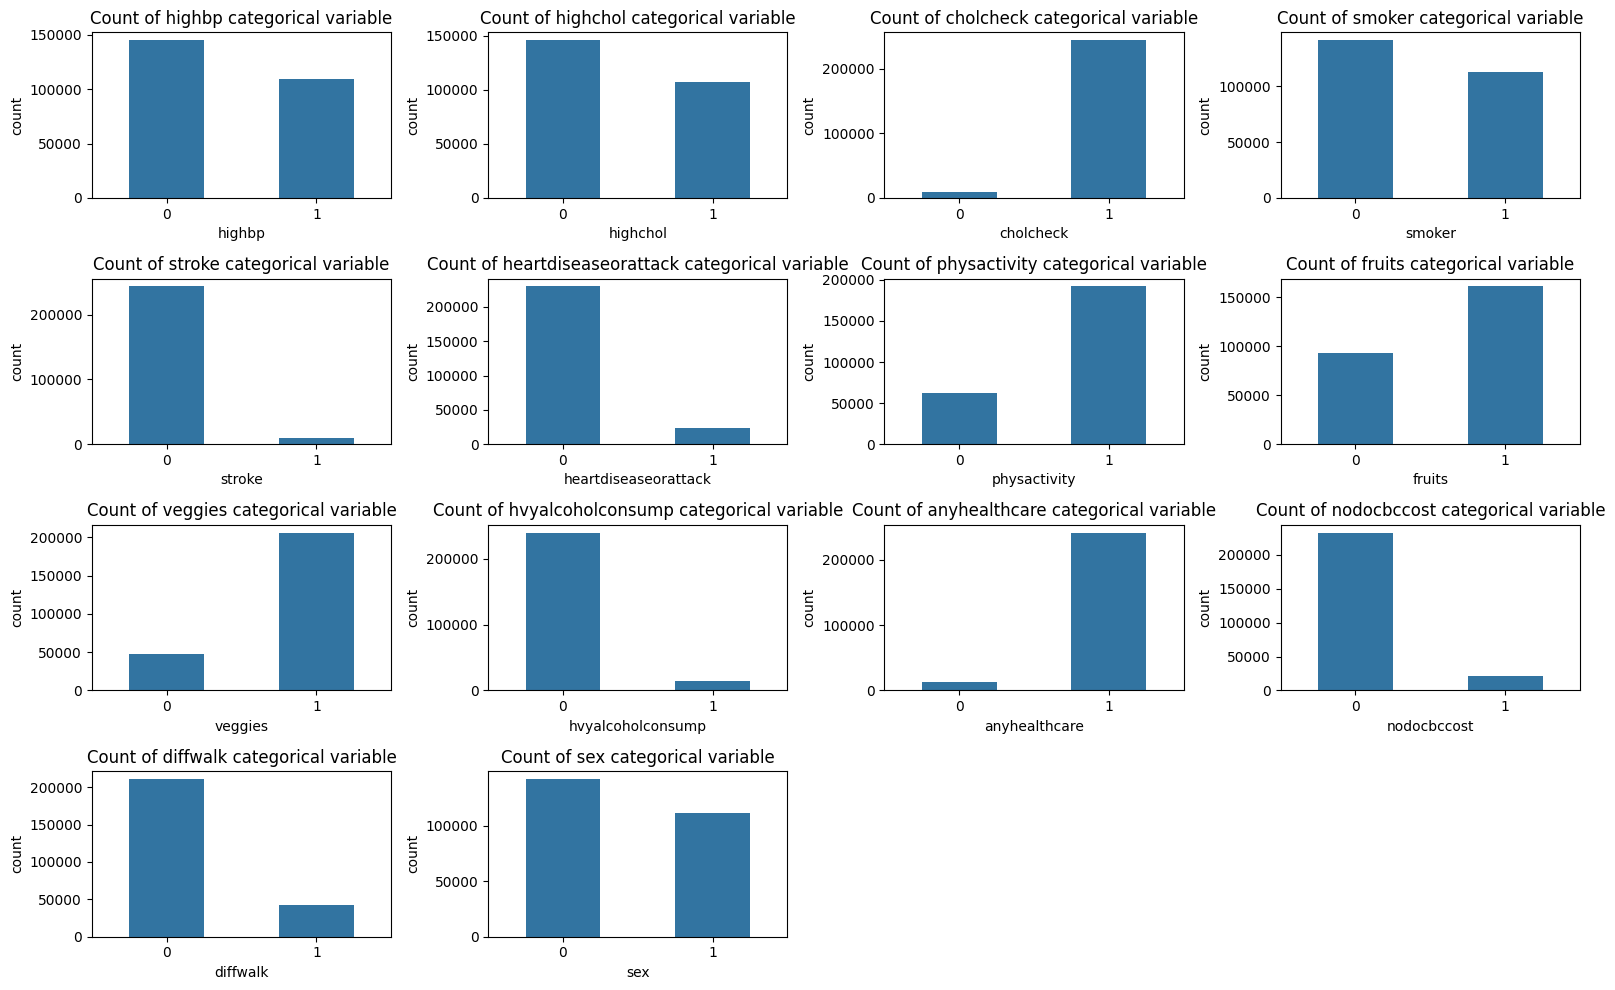

In [ ]:
bin_var = [col for col in X.columns if col not in num_var+['education', 'income', 'genhlth']]

fig, axes = plt.subplots(4, 4, figsize=(16, 10))

axs = axes.flatten() 

for i, bin in enumerate(bin_var):
    sns.countplot(data=X, x=bin, ax=axs[i], width=0.5)
    axs[i].set_title(f'Count of {bin} categorical variable')
axs[14].axis('off')
axs[15].axis('off')

plt.tight_layout()
plt.show()

Majority of the variable has significant difference between one class and the other class

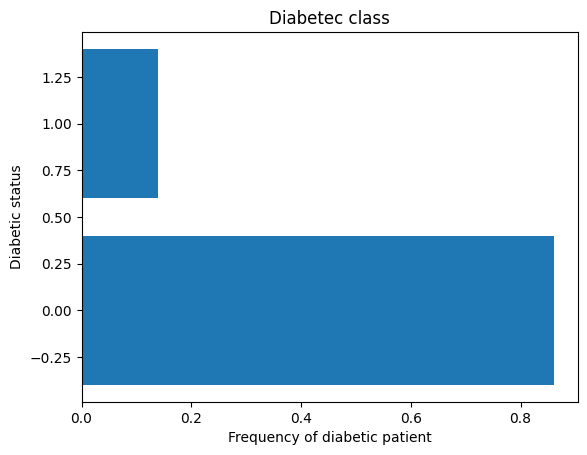

In [ ]:
# look at the target variable 
diabetec_count = y.value_counts(normalize=True).reset_index()
diabetec_count.diabetes_binary = diabetec_count.diabetes_binary.astype(str)
plt.barh(diabetec_count.index, diabetec_count.proportion)
plt.title("Diabetec class")
plt.xlabel('Frequency of diabetic patient')
plt.ylabel('Diabetic status')
plt.show()

Patient without diabetic case is higher significantly than patient without diabetic case. This is one case of imbalance

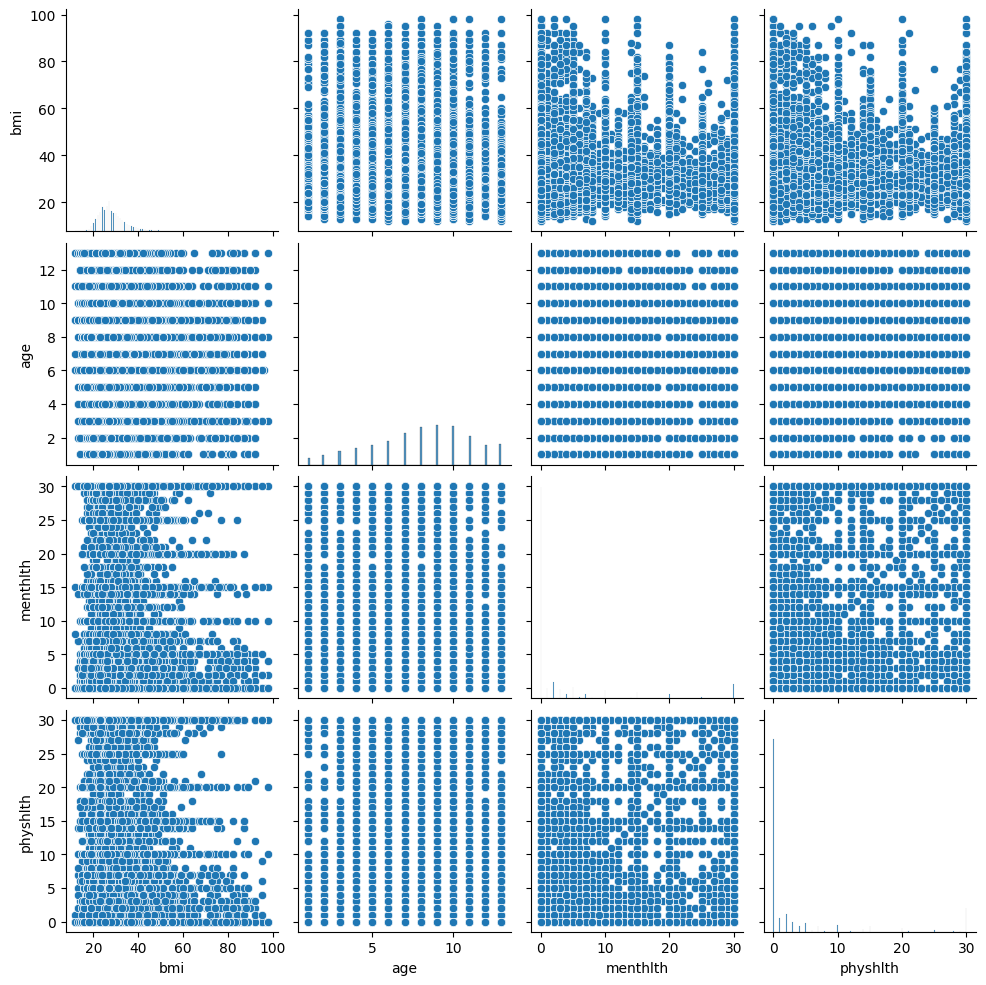

In [ ]:
# find the relationship between numeric variable 
sns.pairplot(X[num_var]) 
plt.show()

All of the numeric variables in X have no strong correlation with each other